## Aprendizaje Estadístico 2024
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

# Gaussian Mixture Models (GMM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

from scipy.stats import multivariate_normal

from sklearn import cluster, datasets
from sklearn.datasets import make_spd_matrix

from sklearn.mixture import GaussianMixture as GMM

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import rand_score, adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score

from mlxtend.plotting import plot_decision_regions

## Data

In [2]:
np.random.seed(2024)

In [3]:
# define the number of samples to be drawn
n_samples = 100

In [4]:
# define the mean points for each of the systhetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
    t_covs.append(make_spd_matrix(2))

X = []
for mean, cov in zip(t_means,t_covs):
    x = np.random.multivariate_normal(mean, cov, n_samples)
    X += list(x)

X = np.array(X)
#np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (400, 2)


In [5]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)

U, V = np.meshgrid(x,y)

pos = np.array([U.flatten(), V.flatten()]).T
print(pos.shape)
print(np.max(pos[...,1]))

(8000, 2)
10.586262495603332


In [6]:
# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k,X.shape[1]))
print(means)
print(weights)

[[-0.77543999  6.76010731]
 [-0.05959291  6.38280751]
 [ 1.26227653  7.77611236]
 [ 0.06997004  1.18841402]]
[0.25 0.25 0.25 0.25]


In [7]:
# create and initialize a Positive semidefinite convariance matrix 
cov = []
for i in range(k):
    cov.append(make_spd_matrix(X.shape[1]))

cov = np.array(cov)
print(cov.shape)

(4, 2, 2)


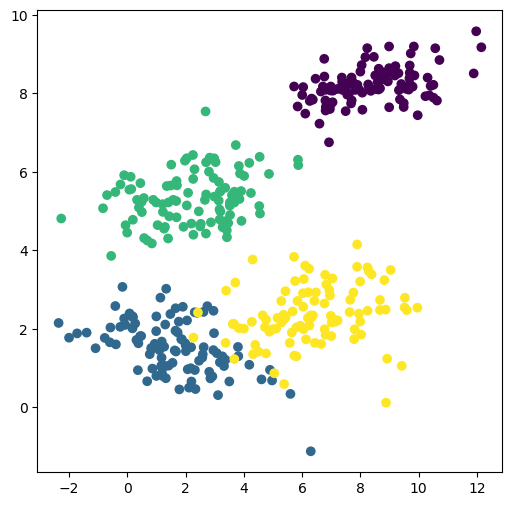

In [8]:
colors = []
for i in range(0, k):
    colors = colors + [i]*n_samples
colors = np.array(colors)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

In [9]:
colors.shape

(400,)

In [10]:
print(colors)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


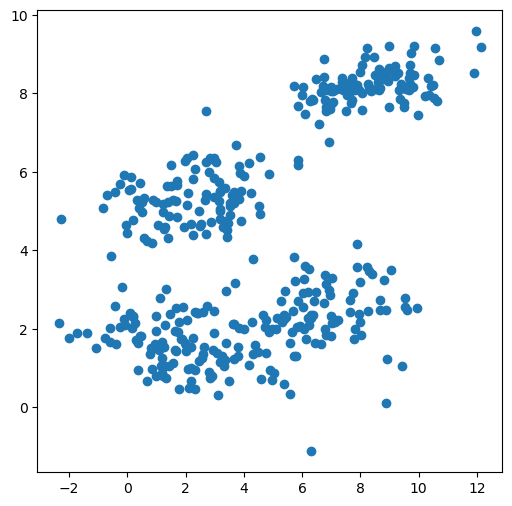

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.show()

# Gaussian Mixture Model (GMM)

In [12]:
gmm = GMM(n_components=4).fit(X)

In [13]:
gmm.covariances_

array([[[ 2.11643472,  0.29742829],
        [ 0.29742829,  0.20670076]],

       [[ 2.32399228, -0.28450693],
        [-0.28450693,  0.38356623]],

       [[ 2.55327535,  0.28312312],
        [ 0.28312312,  0.71730105]],

       [[ 2.47676931,  0.31878607],
        [ 0.31878607,  0.44224147]]])

In [14]:
gmm.means_

array([[8.37975757, 8.2212018 ],
       [1.64220962, 1.58787884],
       [6.4721922 , 2.30989428],
       [2.22493676, 5.33357993]])

In [15]:
gmm.weights_

array([0.24952661, 0.25865172, 0.24087425, 0.25094743])

In [16]:
labels = gmm.predict(X)

In [17]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2]


In [18]:
def redefine_labels(y, yhat, n):
    M = np.zeros((n,n)).astype(int)
    
    for i in range(0, n):
        for j in range(0, n):
            count = (y[yhat == j] == i).sum()
            M[i,j] = count
    
    #recompute labels
    mapp = np.argmax(M, axis=0)
    zhat = yhat.copy()
    for i in range(0, n):
        zhat[yhat == i] = mapp[i]
    return zhat

In [19]:
predicted = redefine_labels(colors, labels, 4)

In [20]:
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 1
 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3]


In [21]:
print(confusion_matrix(colors, predicted))

[[100   0   0   0]
 [  0  96   0   4]
 [  0   0 100   0]
 [  0   8   0  92]]


In [22]:
print(classification_report(colors, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.92      0.96      0.94       100
           2       1.00      1.00      1.00       100
           3       0.96      0.92      0.94       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [23]:
print(precision_score(colors, predicted, average='macro'))

0.9703525641025642


In [24]:
print(recall_score(colors, predicted, average='macro'))

0.97


In [25]:
print('Rand score:           ', rand_score(colors, predicted))
print('Adjusted Rand score:  ', adjusted_rand_score(colors, predicted))
print('Davies-Bouldin score: ', davies_bouldin_score(colors.reshape(-1,1), predicted))
print('Kalinski-Harabasz score: ', calinski_harabasz_score(colors.reshape(-1,1), predicted))

Rand score:            0.9717293233082707
Adjusted Rand score:   0.9242508088719418
Davies-Bouldin score:  0.2923018648018632
Kalinski-Harabasz score:  1338.8571428571424


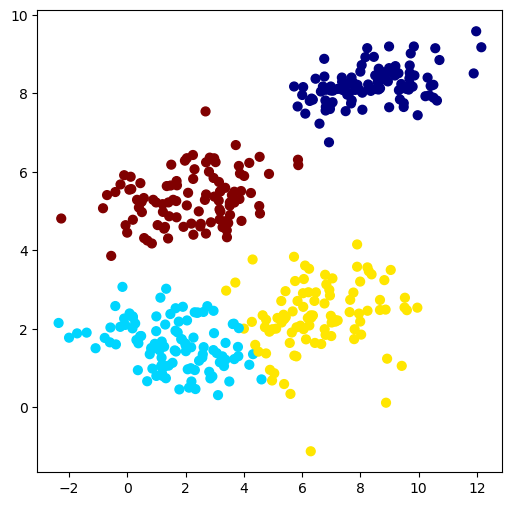

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet)
plt.show()

In [27]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, S, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(S)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [28]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.plot(gmm.means_[:,0], gmm.means_[:,1], 'rx')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [29]:
gmm = GMM(n_components=4, random_state=2023)

/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_70224/3882310887.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


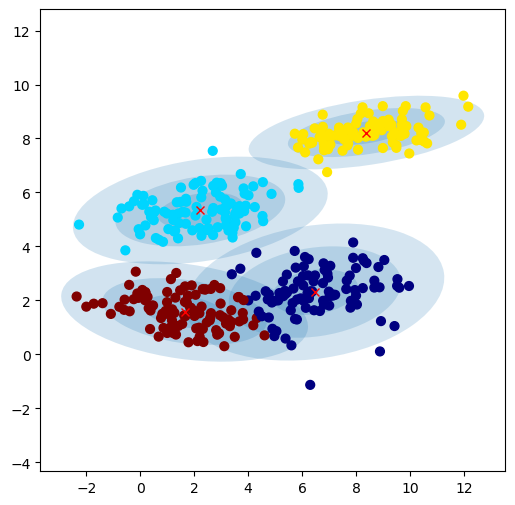

In [30]:
plt.figure(figsize=(6,6))
plot_gmm(gmm, X, label=True)
plt.show()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


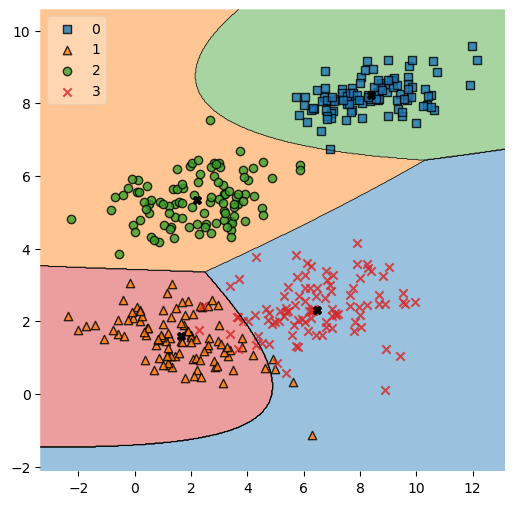

In [31]:
# Plotting decision regions
plt.figure(figsize=(6,6))
plot_decision_regions(X, colors, clf=gmm, legend=2)
plt.plot(gmm.means_[:,0], gmm.means_[:,1], 'kX')
# Adding axes annotations
plt.title('')
plt.show()

## Ejemplo (Moons dataset)

In [32]:
X, colors = datasets.make_moons(200, noise=.1, random_state=2023)

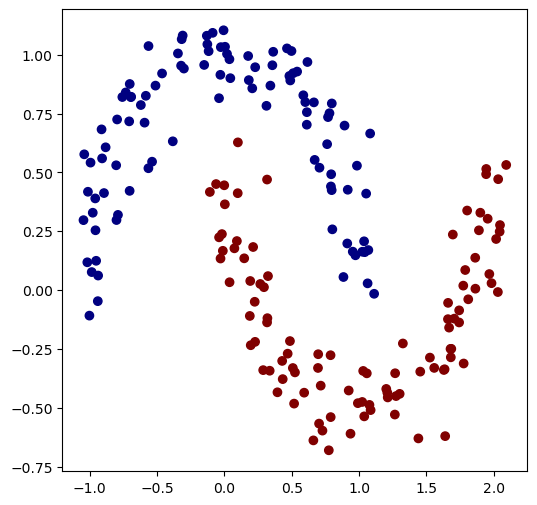

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.jet)
plt.show()

In [34]:
gmm = GMM(n_components=10, random_state=2024)

/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_70224/3882310887.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


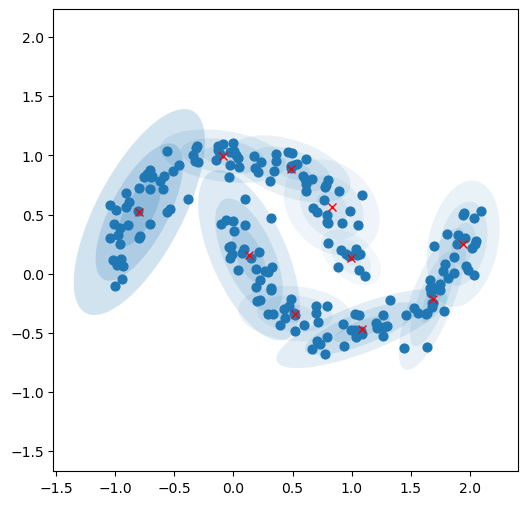

In [35]:
plt.figure(figsize=(6,6))
plot_gmm(gmm, X, label=False)
plt.show()

In [36]:
labels = gmm.predict(X)

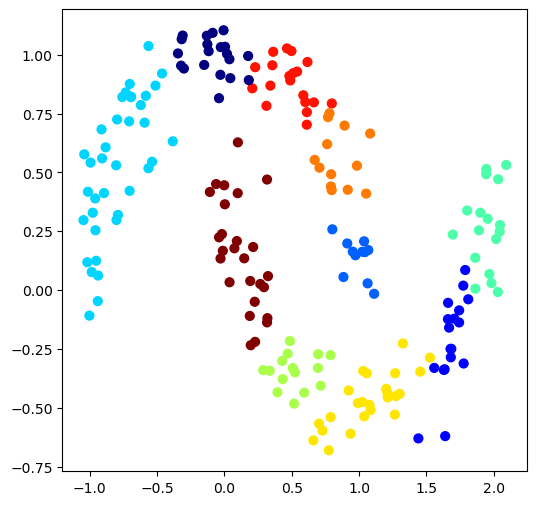

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.jet)
plt.show()

In [38]:
labels[colors == 0]

array([2, 3, 3, 2, 0, 8, 2, 0, 2, 7, 8, 3, 8, 7, 3, 3, 3, 2, 7, 0, 3, 3,
       3, 3, 8, 3, 8, 0, 0, 3, 7, 3, 8, 8, 3, 0, 7, 7, 7, 3, 0, 7, 7, 3,
       2, 3, 0, 3, 8, 0, 2, 3, 3, 2, 0, 8, 3, 3, 8, 3, 0, 3, 3, 7, 0, 3,
       8, 3, 3, 3, 8, 8, 3, 0, 2, 0, 3, 2, 8, 7, 0, 3, 8, 3, 3, 3, 7, 0,
       0, 8, 0, 8, 0, 8, 3, 7, 0, 2, 8, 3])

In [39]:
labels[colors == 1]

array([4, 9, 1, 4, 6, 1, 6, 9, 6, 6, 9, 6, 6, 6, 4, 4, 1, 9, 6, 1, 5, 5,
       9, 1, 6, 6, 4, 6, 6, 6, 9, 5, 5, 1, 6, 4, 6, 9, 4, 5, 4, 9, 5, 6,
       9, 9, 5, 9, 4, 9, 1, 1, 5, 1, 6, 6, 4, 9, 6, 9, 1, 1, 4, 4, 9, 9,
       5, 5, 9, 6, 9, 5, 6, 9, 1, 4, 1, 9, 4, 1, 4, 5, 4, 5, 9, 6, 1, 9,
       9, 6, 1, 9, 5, 1, 1, 5, 9, 9, 6, 4])

In [40]:
# redefine classes

newlabels = labels.copy()
class0 = list(set(labels[colors == 0]))
class1 = list(set(labels[colors == 1]))
print (class0, class1)

for i in class0:
    newlabels[labels == i] = 0

for i in class1:
    newlabels[labels == i] = 1

[0, 2, 3, 7, 8] [1, 4, 5, 6, 9]


In [41]:
print(newlabels)

[0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0
 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0]


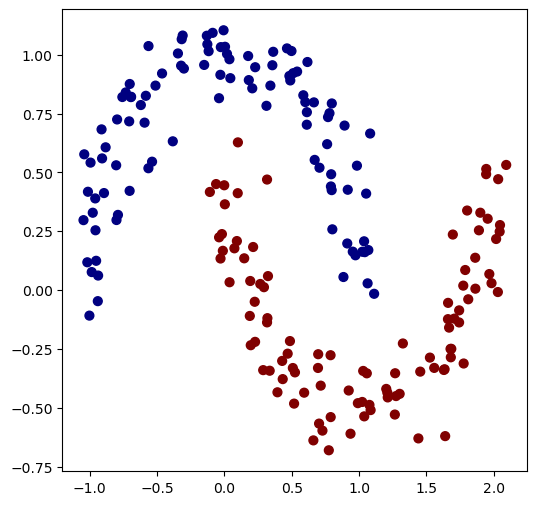

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=newlabels, s=40, cmap=plt.cm.jet)
plt.show()

In [43]:
print(confusion_matrix(colors, newlabels))

[[100   0]
 [  0 100]]


In [44]:
print(classification_report(colors, newlabels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [45]:
print(precision_score(colors, newlabels, average='macro'))

1.0


In [46]:
print(recall_score(colors, newlabels, average='macro'))

1.0
